In [7]:
import datetime
import numpy as np
import datetime
import matplotlib.pyplot as plt
from createdatas import gaussian_beam
import os #システム操作系
from pathlib import Path #ファイル操作系
date = str(datetime.date.today())
print(date)

2020-11-13


In [2]:
NOISE = 30

#ガウス関数の動作確認
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0
# ガウシアンビームの関数の定義
def gaussian_beam(x,a,b,c,d):
    return  a * np.exp(-2*(x-b)*(x-b)/c/c) + d

param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
param_ini_y = np.array([i0, y0, w0, h0])
# x配列とy配列
x_array = np.arange(-50, 50, 1.0)                         # x配列
y_array = np.arange(-50, 50, 1.0)                         # y配列
nx = len(x_array)
ny = len(y_array)
intensity = np.zeros((nx, ny))                            # ノイズを含まない2次元強度分布
intensity = np.zeros((nx, ny))                            # ノイズを含まない2次元強度分布
x_grid, y_grid = np.meshgrid(x_array, y_array)
intensity = i0 * np.exp(-2*((x_grid-x0)**2 + (y_grid-y0)**2)/w0**2).T
profile_y_1 = np.zeros(ny)

# 2次元の強度分布にノイズを付与
noise = (np.random.rand(nx*ny)-0.5)*i0*NOISE*0.01   #プラスマイナスNOISE%のノイズ(一様分布), (np.random.rand(nx*ny)-0.5)*2の部分が-1から1までの乱数になる
noise = noise.reshape((nx,ny))
intensity_noise = intensity + noise

# 最大値の探索 & その位置の強度プロファイルの取得
idx = np.unravel_index(np.argmax(intensity_noise), intensity_noise.shape)
profile_y_1 = intensity_noise[idx[0],:]
profile_y_2 = intensity[idx[0],:]

In [9]:
#　テストデータ取得
data_size = 100 #配列の大きさ
x = np.zeros(data_size)

file_path = "/Users/nagaiyuma/Desktop/201021/5.txt"
with open(file_path) as f:
    file_str = f.read().splitlines()
    f.close

    for i in range(0, data_size):
        x[i] = float(file_str[i])

NameError: name 'x' is not defined

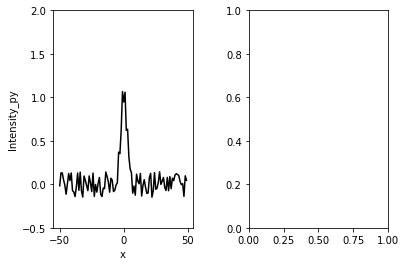

In [3]:
#表示と保存
savename = date + "noise%dcheck.png"%(NOISE)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(x_array, profile_y_1,  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_py')
plt.ylim(-0.5, 2.0)      # y軸の表示範囲
plt.subplot(1,2,2)
plt.plot(x_array, x,  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_vi')
plt.ylim(-0.5, 2.0)
plt.savefig(savename)
plt.show()
plt.close()

In [3]:
#元のガウス関数-viデータ取得
data_size = 100 #配列の大きさ
_x = np.zeros(data_size)

file_path = "/Users/nagaiyuma/Desktop/201021/_5.txt"
with open(file_path) as f:
    file_str = f.read().splitlines()
    f.close

    for i in range(0, data_size):
        _x[i] = float(file_str[i])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nagaiyuma/Desktop/201021/_5.txt'

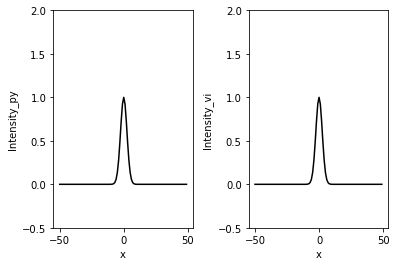

In [16]:
#表示と保存
savename = date + "check.png"
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(x_array, profile_y_2,  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_py')
plt.ylim(-0.5, 2.0)      # y軸の表示範囲
plt.subplot(1,2,2)
plt.plot(x_array, _x,  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_vi')
plt.ylim(-0.5, 2.0)
plt.savefig(savename)
plt.show()
plt.close()

In [6]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, f'savefig{NOISE}%')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/savefig30%


経過時間:2.6987738609313965[sec]
平均絶対誤差: 0.116108 ± 0.087896
現在時刻： 2020-11-13 17:18:40.707697
保存ファイル名： 2020-11-13_17-18.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig30%/2020-11-13_17-18.svg


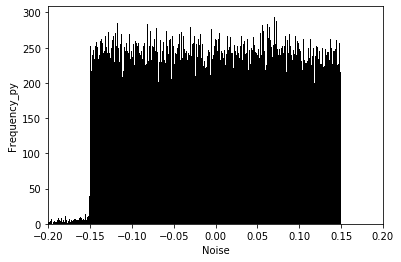

In [12]:
from createdatas2 import createdata2

test_num = 1000 #データ数
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((test_num, 4))
fit_param_y = np.zeros((test_num, 4))
NOISE = 30

x = np.zeros((test_num, data_size))
y = np.zeros((test_num, data_size))
t = np.zeros((test_num, 3))
ty = np.zeros((test_num, 3))

createdata2(test_num, NOISE, data_size, x, y, t, ty, fit_param_x, fit_param_y)
py_noise = (x - profile_y_2).flatten()

dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

# ヒストグラムのグラフを作成
plt.figure()
plt.hist(py_noise, bins=500, color='black')
plt.xlabel('Noise')
plt.ylabel('Frequency_py')
plt.xlim(-0.2, 0.2)
plt.savefig(savename)
plt.show()
plt.close()

In [16]:
save_data = np.array((x.T[0],t.T[0]))
print(save_data.shape)

(2, 1000)


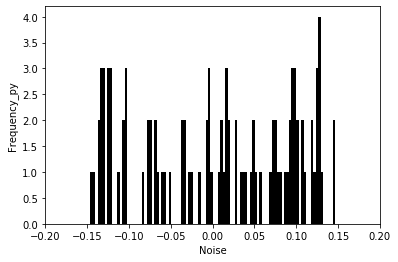

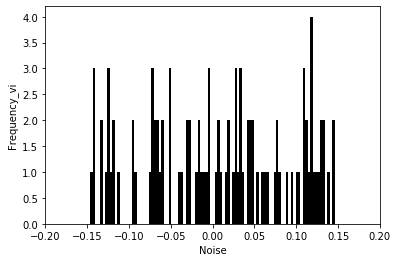

In [22]:
py_noise = profile_y_1 - profile_y_2
vi_noise = x - _x

# ヒストグラムのグラフを作成
plt.figure()
save_name = "py_noise%d_histogram.png" % (NOISE)
plt.hist(py_noise, bins=100, color='black')
plt.xlabel('Noise')
plt.ylabel('Frequency_py')
plt.xlim(-0.2, 0.2)
plt.savefig(savename)
plt.show()
plt.close()

plt.figure()
savename = "vi_noise%d_histogram.png" % (NOISE)
plt.hist(vi_noise, bins=100, color='black')
plt.xlabel('Noise')
plt.ylabel('Frequency_vi')
plt.xlim(-0.2, 0.2)
plt.savefig(savename)
plt.show()
plt.close()

In [4]:
#10,000データの確認
test_num = 100 #データ数
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((test_num, 4))
fit_param_y = np.zeros((test_num, 4))
NOISE = 30

x = np.zeros((test_num, data_size))
y = np.zeros((test_num, data_size))
t = np.zeros((test_num, 3))
ty = np.zeros((test_num, 3))

createdata(test_num, NOISE, data_size, x, y, t, ty, fit_param_x, fit_param_y)

print(x.shape)

経過時間:2.410696029663086[sec]
平均絶対誤差: 0.113517 ± 0.084659
(100, 100)


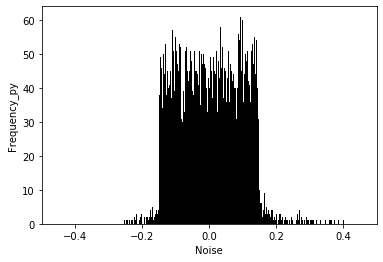

In [9]:
py_noise = (x - profile_y_2).flatten()

# ヒストグラムのグラフを作成
plt.figure()
savename = date + "py_noise%d_histogram.png" % (NOISE)
plt.hist(py_noise, bins=500, color='black')
plt.xlabel('Noise')
plt.ylabel('Frequency_py')
plt.xlim(-0.5, 0.5)
plt.savefig(savename)
plt.show()
plt.close()

In [6]:
test_num = 100 #データ数
data_size = 100 #配列の大きさ

_x = np.zeros((test_num, data_size))
x1 = np.zeros((test_num, data_size))
test_nums = range(0, test_num)

def _testdata(x, t):    
    for key in test_nums:
        file_path = "/Users/nagaiyuma/Desktop/201026/x_" + str(test_nums[key]) + ".txt"
        with open(file_path) as f:
            file_str = f.read().splitlines()
            f.close

        for i in range(0, data_size):
            x[key][i] = float(file_str[i])

    for key in test_nums:
        file_path = "/Users/nagaiyuma/Desktop/201026/_" + str(test_nums[key]) + ".txt"
        with open(file_path) as f:
            file_str = f.read().splitlines()
            f.close
            
        for i in range(0, data_size):
            _x[key][i] = float(file_str[i])

    return x, _x


_testdata(x1, _x)

print(x1.shape)
print(_x.shape)

(100, 100)
(100, 100)


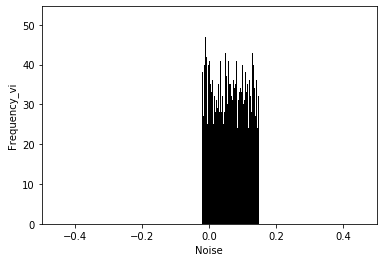

In [7]:
vi_noise = (x1 - _x).flatten()
plt.figure()
savename = date + "vi_noise%d_histogram.png" % (NOISE)
plt.hist(vi_noise, bins=500, color='black')
plt.xlabel('Noise')
plt.ylabel('Frequency_vi')
plt.xlim(-0.5, 0.5)
plt.savefig(savename)
plt.show()
plt.close()

In [8]:
ave = np.average(abs(_x-profile_y_2))
std = np.std(_x-profile_y_2)
print(str(ave) + "±" + str(std))

0.0033973696223239583±0.013104206975195118


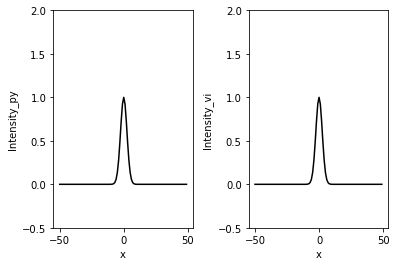

In [34]:
#表示と保存
savename = date + "check.png"
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(x_array, profile_y_2,  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_py')
plt.ylim(-0.5, 2.0)      # y軸の表示範囲
plt.subplot(1,2,2)
plt.plot(x_array, _x[8],  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_vi')
plt.ylim(-0.5, 2.0)
plt.savefig(savename)
plt.show()
plt.close()

In [32]:
print(_x[0])

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.002 0.006 0.02  0.056 0.135 0.278 0.487
 0.726 0.923 1.    0.923 0.726 0.487 0.278 0.135 0.056 0.02  0.006 0.002
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


In [ ]:
for n in range(N):        # 繰り返し精度を調べるために各ノイズ割合でN回実行
    center = data_size/2
    # x配列とy配列
    x_array = np.arange(-center, center, 1.0)                         # x配列
    y_array = np.arange(-center, center, 1.0)                         # y配列
    nx = len(x_array)
    ny = len(y_array)
    intensity = np.zeros((nx, ny))                            # ノイズを含まない2次元強度分布
    x0 = x0 + center
    y0 = y0 + center
    for i in range(nx):
        for j in range(ny):
            intensity[i][j] = i0 * np.exp(-2*((i-x0)*(i-x0) + (j-y0)*(j-y0))/w0/w0)
    x0 = x0 - center
    y0 = y0 - center
    # 最大強度を取る位置における強度プロファイル
    profile_x = np.zeros(nx)
    profile_y = np.zeros(ny)
    

    # 2次元の強度分布にノイズを付与
    noise = (np.random.rand(nx*ny)-0.5)*i0*NOISE*0.01   #プラスマイナスNOISE%のノイズ(一様分布), (np.random.rand(nx*ny)-0.5)*2の部分が-1から1までの乱数になる
    noise = noise.reshape((nx,ny))
    intensity_noise = intensity + noise

    # 最大値の探索 & その位置の強度プロファイルの取得
    idx = np.unravel_index(np.argmax(intensity_noise), intensity_noise.shape)
    profile_x= intensity_noise[:,idx[1]]
    profile_y = intensity_noise[idx[0],:]
    x[n] = profile_x
    y[n] = profile_y
    tx[n] = (i0, x0 + 1.0, w0)